(c) 2023 Manuel Razo. This work is licensed under a [Creative Commons
Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
All code contained herein is licensed under an [MIT
license](https://opensource.org/licenses/MIT).

# Modelando el dogma central

En este ejercicio, analizaremos las ecuaciones diferenciales que describen la
expresión de un gen. Para empezar, comencemos con el caso más sencillo de todos:
un gen que se expresa de manera constitutiva, es decir, un gen sin regulación.

## Expresión constitutiva

Imaginemos que queremos modelar cómo cambia la cantidad de RNA mensajero (mRNA)
en la célula. Para esto definimos la variable $m(t)$ que representará el número
promedio de un mRNA en particular en un conjunto de células. Nótese que el mRNA
es un objeto discreto. Es decir, en una célula no tendría sentido hablar de
tener 1.5 mRNA o nada que no sea un número entero. Pero cuando hablamos del
*promedio* de mRNAs en una población de células, esta cantidad sí puede
considerarse como continua.

Pensemos cuáles son los procesos que pueden ocurrir en una célula que cambiarían
el número de mRNAs. Existen al menos dos procesos que tenemos que considerar:
1. la produción de una molécula de mRNA,
2. la degradación de una molécula de mRNA. 

El modelo que escribamos que describa la dinámica del número de mRNAs entonces
tiene que incluir estos dos procesos. Recordemos que una ecuación diferencial es
una simple regla de cambio de cómo varía en el tiempo una cantidad de interés.
Nuestro objetivo es entonces predecir el número de mRNAs en un instante en el
futuro, $m(t + \Delta t)$ dada la información presente. Podemos entonces
escribir
$$
m(t + \Delta t) = 
\underbrace{m(t)}_{\text{\# de mRNA ahora}}
+ \overbrace{r\Delta t}^{\text{produccion constante de mRNA}}
- \underbrace{\gamma \; m(t) \Delta t}_{\text{degradacion de RNA}}.
\tag{1}
$$

Disectemos cada uno de los términos en la Eq. 1. El primer término del lado
derecho nos dice que el número de mRNAs en un instante en el futuro depende del
número presente de mRNAs. El siguiente término, $r \Delta t$ captura la idea de
expresición constitutiva. La producción de nuevos mRNAs no depende del número 
actual de mRNAs. Depende de otros factores como el número de RNA polimerasas y
de nucleótidos en la célula. Pero capturaremos toda esa complejidad en un simple
parámetro constante $r$ que debe de tener unidades de
$$
r [=] \frac{\text{mRNA}}{\text{tiempo}}.
\tag{2}
$$
Es decir, es una tasa de producción de mRNAs. El tercer término de lado derecho
de la Eq. 1 representa la degradación de mRNAs. La cantidad de mRNAs que se
degradan en una ventana de tiempo $\Delta t$ depende del número actual de mRNAs.
Pensémoslo de la siguiente manera. Imaginemos que cada instante, cada mRNA lanza
una moneda con probabilidad $\gamma \Delta t$ de caer en sello. Si cae en sello,
el mRNA se degrada. Si cae en águila con probabilidad $1 - \gamma \Delta$, el
mRNA no es degradado. La clave es que la probabilidad $\gamma \Delta$ es muy
pequeña, por lo que no veremos a todos lo mRNAs degradarse simultaneamente.
Digamos que si tenemos 100 mRNAs, en promedio veremos a uno degradarse en cada
instante. Esto implica que si tenemos 1000 mRNAs, esperamos ver 10 veces más
eventos de degradación. Es eso lo que captura el multiplicar la tasa de
degradación $\gamma$ con el numero de mRNAs. Esta tasa de degradación tiene
unidades de
$$
\gamma [=] \frac{1}{\text{tiempo}},
\tag{3}
$$
que no son las mismas que en la Eq. 2.

Comencemos por importar los paquetes que necesitaremos.

In [2]:
# Importar paquete para analisis numerico
import numpy as np

# Importar paquete para graficar curvas
import matplotlib.pyplot as plt

# Importar paquete para estilo de graficas
import seaborn as sns

# Establecer estilo de grafica
sns.set_theme()

Habiendo escrito la Eq. 1, definamos los parámetros para integrar esta ecuación
numéricamente.

In [6]:
# Definir tamaño de pasa de tiempo
delta_t = 0.01

# Definir el tiempo de integración
t = 100

# Calcular el numero de pasos
n_steps = int(t / delta_t)

# Definir los tiempos en que se evalua la ecuaion
t_array = np.linspace(0, t, n_steps)

# Definir el numero inicial de mRNAs
m_init = 0

# Definir tasa de prduccion
r = 1   # [=] mRNA / tiempo

# Definir la tasa de degradacion
gamma = 0.1     # [=] 1 / tiempo

Con los parámetros en mano, definamos la Eq. 1 en un ciclo `for`.

In [7]:
# Inicializar arreglo para almacenar numero de mRNAs
m_array = np.zeros(n_steps)

# Agregar condicion inicial
m_array[0] = m_init

# Iterar en cada paso de tiempo
for t in range(n_steps - 1):
    m_array[t+1] = m_array[t] + r * delta_t - gamma * delta_t * m_array[t]

Grafiquemos el resultado

Text(0, 0.5, 'mRNA')

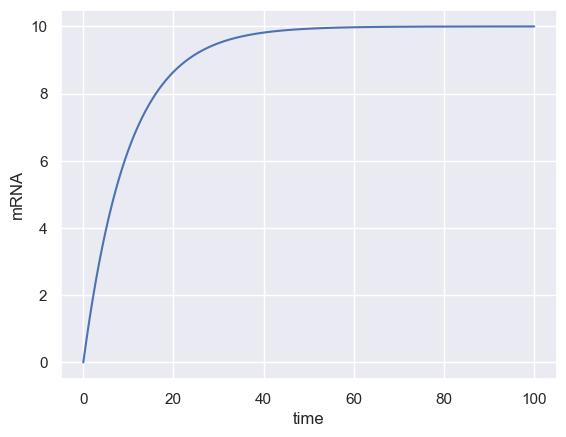

In [8]:
# Graficar tiempo vs masa
plt.plot(t_array, m_array)

# Anotar ejes
plt.xlabel("time")
plt.ylabel("mRNA")

Podemos observar que el valor de mRNAs converge a 10 mRNA por célula. Esto
ocurre cuando la tasa de producción es la misma que la tasa de degradación.
Llamemos a este valor al que convergen los mRNAs $m^*$. Es lo que se conoce como
el "steady state" o estado estable del sistema dinámico. El valor de este estado
estable depende de los parámetros $r$ y $\gamma$. Podemos encontrar cómo se
relacionan esos parámetros con un poco de álgebra.


## Calculando el estado estable del sistema

Para poder calcular el valor de $m^*$ pensando de la siguiente manera: el llegar
a un estado estable significa que el valor de $m(t)$ ya no cambia en el tiempo.
Esto implica que cuando $t$ es muy grande, encontramos que
$$
m(t + \Delta t) = m(t),
\tag{4}
$$
es decir, el valor de $m(t)$ se mantiene constante. Usando esta equivalencia
podemos sustituir el lado izquierdo de la Eq. 1, obteniendo
$$
m(t) = m(t) + r\Delta t - \gamma \; m(t) \Delta t.
\tag{5}
$$
Podemos entonces cancelar el término en el lado izquierdo con el primer término
del lado derecho. Esto resulta en
$$
0 = r\Delta t - \gamma \; m^* \Delta t,
\tag{6}
$$
donde sustituímos $m(t)$ por $m^*$ porque estamos asumiendo que llegamos al
estado estable que estamos buscando. Podemos despejar los términos para dejar a
$m^*$ aislado, obteniendo
$$
m^* = \frac{r\Delta t}{\gamma \Delta t} = \frac{r}{\gamma}.
\tag{7}
$$
Este resultado demuestra que el estado estable del sistema está definido por el
cociente de la tasa de producción $r$ y la de degradación $\gamma$. Para
demostrar que este resultado aplica independiente del número inicial de mRNAs,
repitamos la integración numérica, esta vez con múltiples condiciones iniciales.

In [14]:
# Definir tasa de produccion
r = 1
# Definir tasa de degradacion
gamma = 0.1
# Definir lista de condiciones iniciales
m_init = np.array([0.0, 3.0, 6.0, 14.0, 17.0, 20.0])

# Inicializar matriz para salvar numero de mRNAs
m_mat = np.zeros([len(t_array), len(m_init)])

# Guardemos la condicion inicial
m_mat[0, :] = m_init


# Ciclemos por los puntos en el tiempo
for t in range(len(t_array) - 1):
    # Ciclemos por las condiciones iniciales
    for m in range(len(m_init)):
        m_mat[t+1, m] = m_mat[t, m] + r * delta_t - \
            gamma * delta_t * m_mat[t, m]

Grafiquemos cada una de las trajectorias.

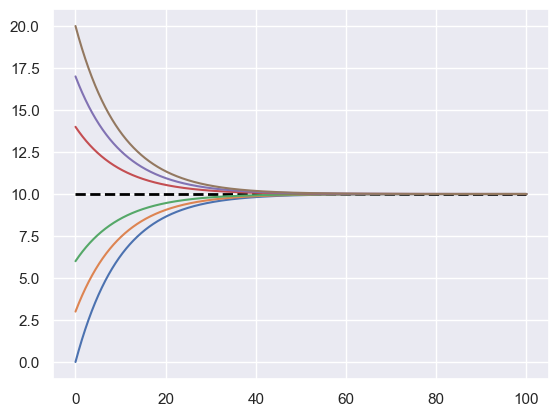

In [25]:
# Graficar estado estable predicho
plt.hlines(r / gamma, min(t_array), max(t_array),
           linestyle="--", color="black", linewidth=2)

# Ciclar por condiciones iniciales
for m in range(np.shape(m_mat)[1]):
    plt.plot(t_array, m_mat[:, m])

Como lo derivamos analíticamente, sin importar la codición inicial, todas las
trayectorias convergen al estado estable definido por la Eq. 7.